# Task 4

This notebook analyzes traffic accident data to identify patterns related to
time of day, weather conditions, and accident severity using the US Accidents dataset.

Dataset Source: Kaggle

Link: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

### Step 1: Imported Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

### Step 2: Load the dataset

In [3]:
# Download from Kaggle and place in the same directory
df = pd.read_csv("us_accidents.csv")
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


### Step 3: Perform Data Cleaning & Feature Engineering

In [4]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

df = df.dropna(subset=['Start_Lat', 'Start_Lng'])

df[['Hour', 'DayOfWeek']].head()

,Hour,DayOfWeek
0,5.0,Monday
1,6.0,Monday
2,6.0,Monday
3,7.0,Monday
4,7.0,Monday


### Step 4: Perform Data Visualisation

Accidents in each Hour of Day

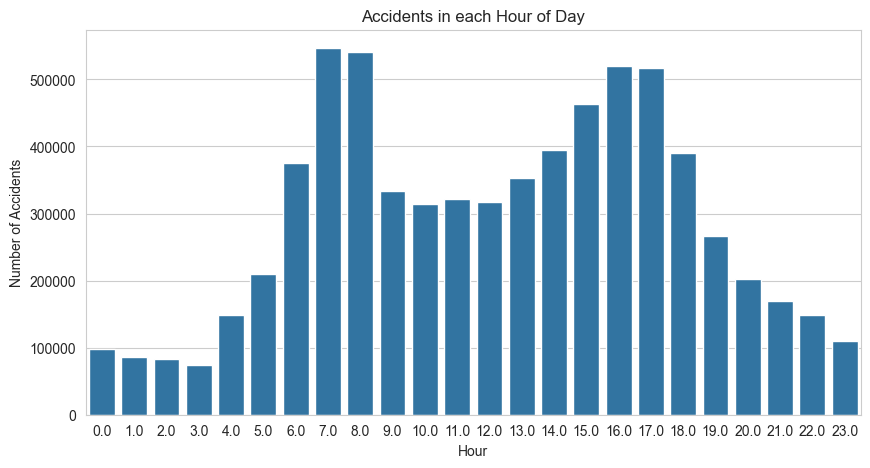

In [6]:
sns.countplot(x='Hour', data=df)
plt.title("Accidents in each Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()

Accidents on each Day of Week

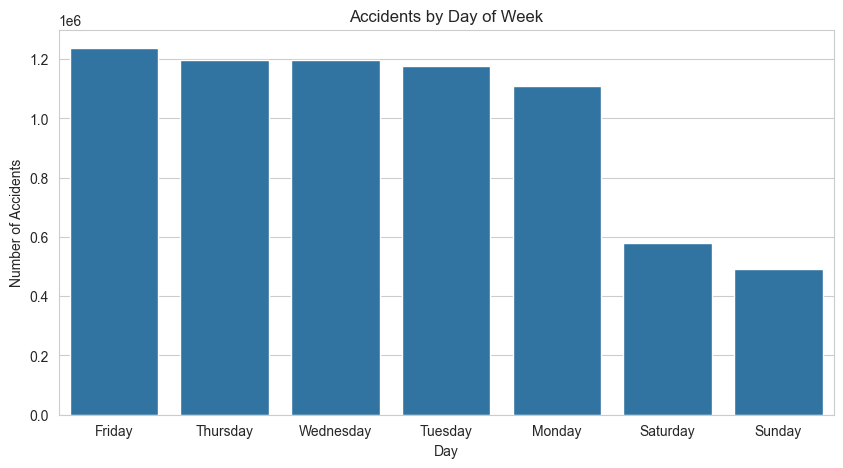

In [9]:
order = df['DayOfWeek'].value_counts().index
sns.countplot(x='DayOfWeek', data=df, order=order)
plt.title("Accidents by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.show()

Weather Condition Analysis

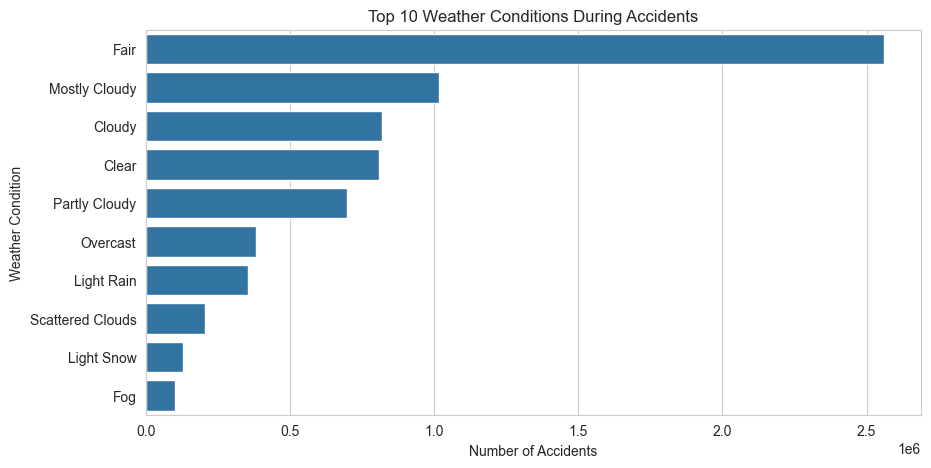

In [ ]:
top_weather = df['Weather_Condition'].value_counts().head(10)

sns.barplot(x=top_weather.values, y=top_weather.index)
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()

Accident Severity Distribution

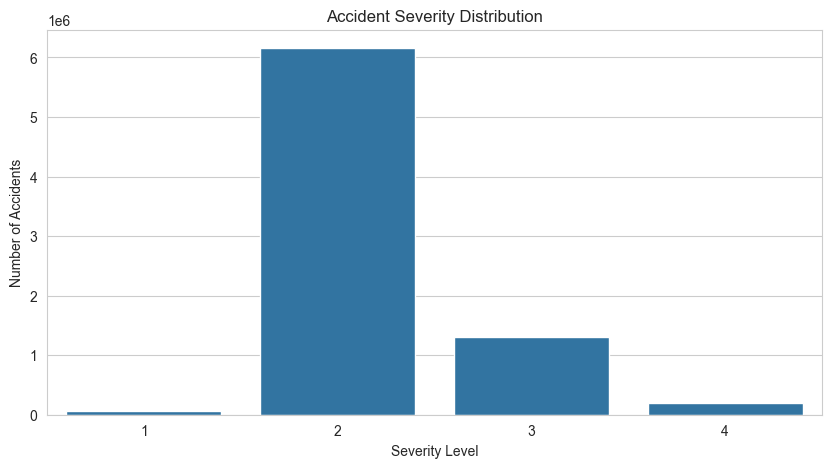

In [11]:
sns.countplot(x='Severity', data=df)
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()

Accident Hotspot Visualization

In [14]:
import folium
from folium.plugins import HeatMap

sample_df = df.sample(20000, random_state=42)

m = folium.Map(
    location=[sample_df['Start_Lat'].mean(), sample_df['Start_Lng'].mean()],
    zoom_start=5
)

HeatMap(list(zip(sample_df['Start_Lat'], sample_df['Start_Lng']))).add_to(m)
m

### Key Takeaways:

Accidents spike during rush hours

Weather plays a significant role, even in non-extreme conditions

Urban areas show higher accident concentration